**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [985]:
##importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [986]:
## importing 2 calss classification data using pandas library

In [987]:
twoclass_df = pd.read_csv('2Classdata.csv')

In [988]:
## printing the two class dataframe
twoclass_df.shape
## the data has 310 observations and 7 attributes

(310, 7)

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [989]:
print('By analysing the data frame,we can observe that mean is greater than median for pelvic_incidence, pelvic_titl_numeric,lumbar_lordosis_angle and degree of spondylolisthesis attributes, which implies the data is right skewed.The mean is equal to median for sacral_scope, which means, this attribute is normally distributed.The pelvic_radius has  mean lesser than the median which implies that data is skewed negaively')

twoclass_df.describe().T

By analysing the data frame,we can observe that mean is greater than median for pelvic_incidence, pelvic_titl_numeric,lumbar_lordosis_angle and degree of spondylolisthesis attributes, which implies the data is right skewed.The mean is equal to median for sacral_scope, which means, this attribute is normally distributed.The pelvic_radius has  mean lesser than the median which implies that data is skewed negaively


,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [990]:
## head of the dataset
twoclass_df.head(10)
## The first 10 rows of the dataset contains target(dependent) column with abnormal class

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [991]:
## Tail of the dataset
twoclass_df.tail(10)
## The last 10 rows of the dataset contains target(dependent) column with normal class

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [992]:
## Finding out the missing values

In [993]:
twoclass_df.isnull()
##using is null to find the null values in the data frame


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [994]:
twoclass_df.isnull().sum()
##The two class data set does not contain any null values

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [995]:
## The data types of the dataset
twoclass_df.dtypes
## The dataset contains float values for 6 attributes except class attributes which is object

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [996]:
## unique values for class variabl9es
twoclass_df.groupby('class').count()
## From the below details it can be inferred that class has two values Abnormal and Normal.
## Class distribution of Abnormal and normal ratio is 2 :1 . The model will better predict Abnormal and normal classification

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


In [997]:
 ##Look at the distribution of class values and other attributes
twoclass_df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


array([210, 100], dtype=int64)

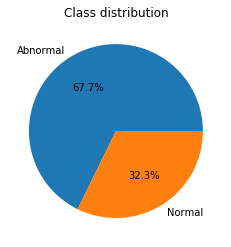

In [998]:
## class column sidtribution
plt.subplot(title ='Class distribution')
plt.pie(twoclass_df.groupby('class').size().values, labels=twoclass_df.groupby('class').size().keys() , autopct='%1.1f%%')
## The class distribution shows that target column has 67.7% Abnormal class
## and 32.3 % of Normal class
twoclass_df.groupby('class').size().values

Text(0.5, 1.0, 'sacral_slope Distribution')

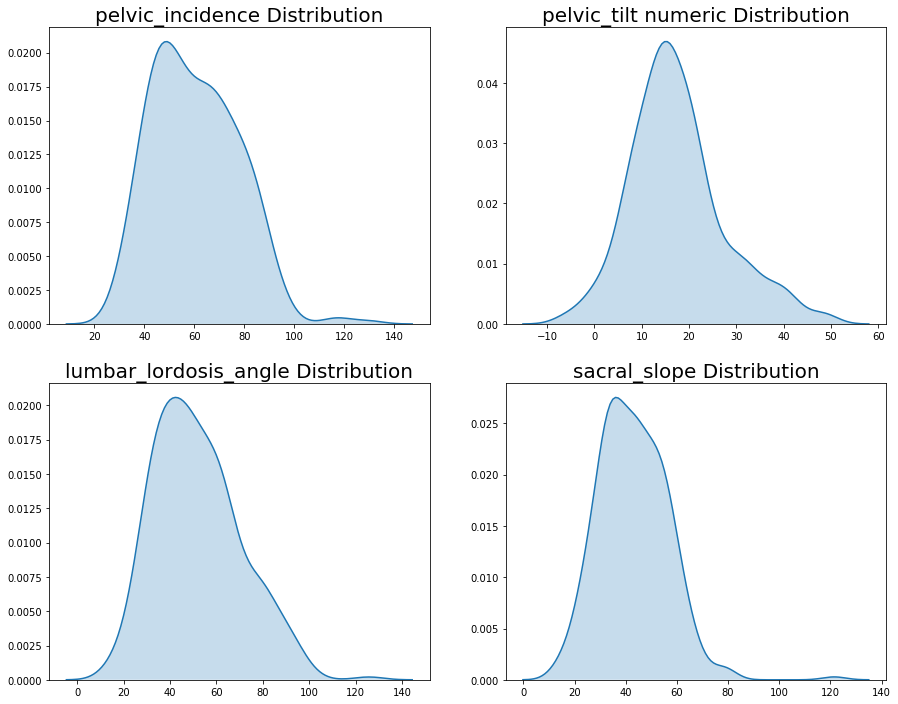

In [999]:
#prepare subplots, with 2 columns and 2 rows
##plotting sitribution  of pelvic_incidence,pelvic_tilt numeric,lumbar_lordsis_angle,sacral_scope using kernel denisty diagram
fig1, ((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2)
#set full plot size
fig1.set_size_inches(15,12)
sns.kdeplot(twoclass_df['pelvic_incidence'], ax=ax11, shade=True, legend=False)
ax11.set_title("pelvic_incidence Distribution", fontsize=20)
sns.kdeplot(twoclass_df['pelvic_tilt numeric'], ax=ax12, shade=True, legend=False)
ax12.set_title("pelvic_tilt numeric Distribution", fontsize=20)
sns.kdeplot(twoclass_df['lumbar_lordosis_angle'], ax=ax13, shade=True, legend=False)
ax13.set_title("lumbar_lordosis_angle Distribution", fontsize=20)
sns.kdeplot(twoclass_df['sacral_slope'], ax=ax14, shade=True, legend=False)
ax14.set_title("sacral_slope Distribution", fontsize=20)
## From the below kdeplot it shows that the pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope numeric attributes are slightly skewed to the right

Text(0.5, 1.0, 'degree_spondylolisthesis Distribution')

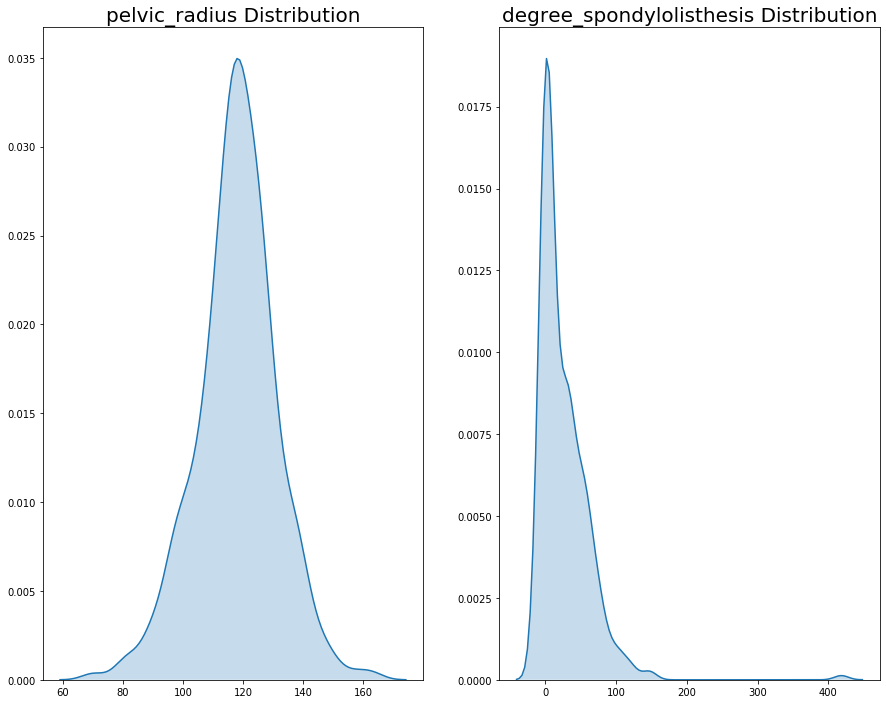

In [1000]:
fig1, (ax11,ax12) = plt.subplots(1,2)
#set full plot size
##plotting the distribution of pelvic_radius distribution and degree_spndylolisthesis using kernel denisty diagram
fig1.set_size_inches(15,12)
sns.kdeplot(twoclass_df['pelvic_radius'], ax=ax11, shade=True, legend=False)
ax11.set_title("pelvic_radius Distribution", fontsize=20)
sns.kdeplot(twoclass_df['degree_spondylolisthesis'], ax=ax12, shade=True, legend=False)
ax12.set_title("degree_spondylolisthesis Distribution", fontsize=20)
## from the below kde distribution, we can observe that pelvic_radius attribute is slightly skewed towards left
##and degree_spondylolisthesis is skewed towards right

In [1001]:
 ##Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

Text(0.5, 1.0, 'Distribution of different classes for pelvic_radius and sacral_slope')

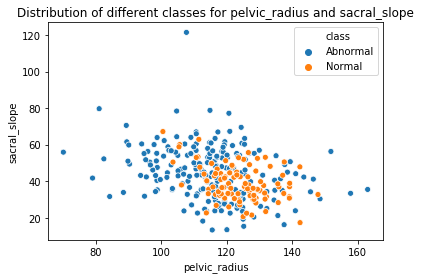

In [1002]:
##using scatterplot to plot the distribution of different classes for pelvic_raidus and sacral_Scope for visualization
x = twoclass_df['pelvic_radius']
y = twoclass_df['sacral_slope']
ax = sns.scatterplot(x, y, hue="class" , data = twoclass_df)
ax.set_title("Distribution of different classes for pelvic_radius and sacral_slope")
## From the below scatter plot it can be inferred that for Abnormal class there is higher correlation between pelvic_radius and
##and sacral_slope with few outliers
   

# Encode the Class variable to integer.

In [1003]:
## encoding the Class variable to integer.

In [1004]:
# Apply the fitted encoder to the species column to convert the categorical value to numeric

twoclass_df['class'] = preprocessing.LabelEncoder().fit_transform(twoclass_df['class'])
## After applying encoder abnormal class are converted to 0 and normal class are converted to 1

In [1005]:
##the converted data for encoding
twoclass_df['class'].value_counts()

0    210
1    100
Name: class, dtype: int64

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [1006]:
## creating the X(Feature-set)  and Y(Target-set)

In [1007]:
## target set is formed by having only the dependent column 
twoclass_label = twoclass_df['class']


In [1008]:
##Feature set is formed by dropping the target column. Feature set consist of only independent columns
twoclass_feature_df = twoclass_df.drop(['class'], axis = 1)
twoclass_feature_df.shape
##the class attribute is dropped which can be shown below

(310, 6)

# Normalize your Data (X) to get values between 0 to 1.

In [1009]:
## The data should not be normalised before forming the train and test data as there is possibility of data leaks
##hence normalising data will be done afer forming the train and test data


# Split the dat as train and test with a ratio of 70:30.

In [1010]:
## splitting the train and test data with 70 : 30 ratio

In [1011]:
#using train_test_split to split the data into 70% of training data and 30% of testing data
twoclass_feature_train_df, twoclass_feature_test_df, twoclass_label_train, twoclass_label_test = train_test_split(twoclass_feature_df, twoclass_label, test_size=0.30,random_state=5)
print('The shape of twoclass_feature_train dataset is',twoclass_feature_train_df.shape)
print('The shape twoclass_feature_test data is',twoclass_feature_test_df.shape)
## 

The shape of twoclass_feature_train dataset is (217, 6)
The shape twoclass_feature_test data is (93, 6)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [1012]:
##building KNN model with train dataset
knn = KNeighborsClassifier(n_neighbors= 21, weights = 'uniform', metric='euclidean')
## using stand scalar to normalize the data which is done only after splitting the train and test data to prevent data leaks
sc=StandardScaler()
scaled_twoclass_feature_train_df = sc.fit_transform(twoclass_feature_train_df)
scaled_twoclass_feature_test_df = sc.transform(twoclass_feature_test_df)
##calculate nearest neighbor algorithm
knn.fit(scaled_twoclass_feature_train_df,twoclass_label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [1013]:
# For every test data point, predict it's label based on 21 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_twoclass_label = knn.predict(scaled_twoclass_feature_test_df)


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [1014]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases
print('The accuracy score is',knn.score(scaled_twoclass_feature_test_df , twoclass_label_test))

The accuracy score is 0.8279569892473119


In [1015]:
##calculating confusion matrix which is a tabel that is often used to descrie the performance of a classification model on a set of test data for which the true values ar known
confusion = metrics.confusion_matrix(twoclass_label_test,predicted_twoclass_label)
                                    
TP = confusion[0, 0]
FN = confusion[0, 1]
FP = confusion[1, 0]
TN = confusion[1, 1]
print('confusion matrix is :')
print(confusion)
print('True positive of Abnormal class is',TP)
print('false negaive of abnormal class is',FN)
print('False positive of abnormal class is',FP)
print('True negative of abnormal class is',TN)

confusion matrix is :
[[54  6]
 [10 23]]
True positive of Abnormal class is 54
false negaive of abnormal class is 6
False positive of abnormal class is 10
True negative of abnormal class is 23


In [1016]:
## The original test data contains 63 abnormal class values and 30 normal class values
## but KNN had predicted  54 abnormal values in target column and 26 normal values in target column.
##using precision metrics to find class level accuracy score for Abnormal class which is True postive / true positive + False positve (54 / 54 + 10) which is 90 %
precision = TP / (TP + FP)
print('Abnormal class accuracy using precision metrics is ',precision*100)
print('The predicted overall accuracy is moderately close to the class level accuracy of abormal class value.Need to find the best k value to find more accurate prediction of data similar to class level accuracy')
## The predicted overall accuracy is moderately close to the class level accuracy of abormal class value.
## usin classification report to find the class level accuracy of class with abnormal values

Abnormal class accuracy using precision metrics is  84.375
The predicted overall accuracy is moderately close to the class level accuracy of abormal class value.Need to find the best k value to find more accurate prediction of data similar to class level accuracy


In [1017]:
##classification report
print('Report  : ')
print(classification_report(twoclass_label_test, predicted_twoclass_label))
## from the classification report we can observe that precision metrics has 84 % accuracy for individual class and recall shows accuracy of 90% for abnormal class
##Need to find more acuracy with the test data with optimal value of K

Report  : 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        60
           1       0.79      0.70      0.74        33

    accuracy                           0.83        93
   macro avg       0.82      0.80      0.81        93
weighted avg       0.83      0.83      0.83        93



# What is the best K value for your classifcation?
#Find at which k value you get the best score.

The accuracy of neighbour 1 is 0.7849462365591398
The accuracy of neighbour 3 is 0.7526881720430108
The accuracy of neighbour 5 is 0.7741935483870968
The accuracy of neighbour 7 is 0.7526881720430108
The accuracy of neighbour 9 is 0.8172043010752689
The accuracy of neighbour 11 is 0.8172043010752689
The accuracy of neighbour 13 is 0.8172043010752689
The accuracy of neighbour 15 is 0.8494623655913979
The accuracy of neighbour 17 is 0.8279569892473119
The accuracy of neighbour 19 is 0.8387096774193549
The accuracy of neighbour 21 is 0.8279569892473119
The accuracy of neighbour 22 is 0.8279569892473119
The accuracy of neighbour 25 is 0.8279569892473119
The accuracy of neighbour 27 is 0.8387096774193549
The accuracy of neighbour 29 is 0.8172043010752689
bycomparing the plot between trained and test data, it can be inferred that a K =15 we get optimal performance during test as that of training, hence the ptimal value for K is 15
The data should be considered due to low accuracy


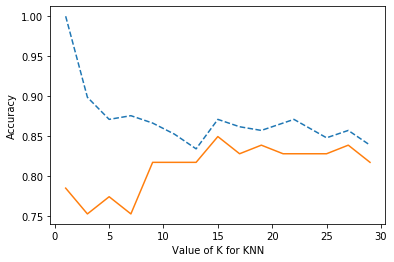

In [1018]:
neighbours = np.array([1,3,5,7,9,11,13,15,17,19,21,22,25,27,29])
testnew = []
trainnew = []
for i in neighbours:
    twoclass_feature_train_df, twoclass_feature_test_df, twoclass_label_train, twoclass_label_test = train_test_split(twoclass_feature_df, twoclass_label, test_size=0.30,random_state=18)
    sc=StandardScaler()
    ##building KNN model with train dataset
    knn = KNeighborsClassifier(n_neighbors= i, weights = 'uniform', metric='euclidean')
    ## using stand scalar to normalize the data
    scaled_twoclass_feature_train_df = sc.fit_transform(twoclass_feature_train_df)
    scaled_twoclass_feature_test_df = sc.transform(twoclass_feature_test_df)
    ##calculate nearest neighbor algorithm
    knn.fit(scaled_twoclass_feature_train_df,twoclass_label_train)
    ##predict the dependent target with the test data
    # For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
    # be assigned to the test data point
    predicted_twoclass_label = knn.predict(scaled_twoclass_feature_test_df)
    ##calculating predicted value using trained label t find the optimal value of K
    predicted_twoclass_label_train = knn.predict(scaled_twoclass_feature_train_df)
    print("The accuracy of neighbour",i, "is",knn.score(scaled_twoclass_feature_test_df , twoclass_label_test))
    ##print("The accuracy of neighbour",i, "is",accuracy_score(twoclass_label_test, predicted_twoclass_label))
    testnew.append(accuracy_score(twoclass_label_test, predicted_twoclass_label))
    trainnew.append(accuracy_score(twoclass_label_train, predicted_twoclass_label_train))
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.plot(neighbours,trainnew, '--')
plt.plot(neighbours,testnew, label = 'test')
## bycomparing the plot between trained and test data, it can be inferred that a K =15 we get optimal performance during test as that of training
print('bycomparing the plot between trained and test data, it can be inferred that a K =15 we get optimal performance during test as that of training, hence the ptimal value for K is 15')
print('The data should be considered due to low accuracy')


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [1019]:
##importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1020]:
## importing 3 calss classification data using pandas library

In [1021]:
threeclass_df = pd.read_csv('3Classdata.csv')
threeclass_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [1022]:
## printing the two class dataframe
threeclass_df.shape
## the data has 310 observations and 7 attributes


(310, 7)

In [1023]:
print('By analysing the data frame,we can observe that mean is greater than median for pelvic_incidence, pelvic_titl,lumbar_lordosis_angle and degree of spondylolisthesis attributes, which implies the data is right skewed.The mean is equal to median for sacral_scope, which means, this attribute is normally distributed.The pelvic_radius has  mean lesser than the median which implies that data is skewed negaively')

threeclass_df.describe().T

By analysing the data frame,we can observe that mean is greater than median for pelvic_incidence, pelvic_titl,lumbar_lordosis_angle and degree of spondylolisthesis attributes, which implies the data is right skewed.The mean is equal to median for sacral_scope, which means, this attribute is normally distributed.The pelvic_radius has  mean lesser than the median which implies that data is skewed negaively


,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [1024]:
# Explore the data set.Get necessary information about the data.
#Look at the head and tail of dataset.
#Find the missing value.
#Look at the unique values of class values.
#Look at the distribution of class values and other attributes.
#Get the datatype information about the dataset
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [1025]:
## head of the dataset
threeclass_df.head(10)
## The first 10 rows of the dataset contains target(dependent) column with hernia class

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [1026]:
## Tail of the dataset
threeclass_df.tail(10)
## The last 10 rows of the dataset contains target(dependent) column with normal class

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [1027]:
## Finding out the missing values

In [1028]:
##using isnull function to find the null value in dataframe
threeclass_df.isnull()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [1029]:
threeclass_df.isnull().sum()
##The three class data set does not contain any null values

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [1030]:
## The data types of the dataset
threeclass_df.dtypes
## The dataset contains float values for 6 attributes except class attributes which is object

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [1031]:
## unique values for class variabl9es
threeclass_df.groupby('class').count()
## From the below details it can be inferred that class has three values Hernia,Spondylolisthesis and Normal.
## The ratio of Classdistribution between Hernia , Normal ans Spondylolsthesis classes are 3:2:1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [1032]:
 ##Look at the distribution of class values and other attributes

array([ 60, 100, 150], dtype=int64)

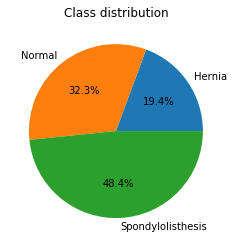

In [1033]:
## class column sidtribution
plt.subplot(title ='Class distribution')
plt.pie(threeclass_df.groupby('class').size().values, labels=threeclass_df.groupby('class').size().keys() , autopct='%1.1f%%')
## The class distribution shows that target column has 32.3.7% Normal class
## 48.4% Spondylolisthesis class, 19.4 % of Hernia class
threeclass_df.groupby('class').size().values

Text(0.5, 1.0, 'sacral_slope Distribution')

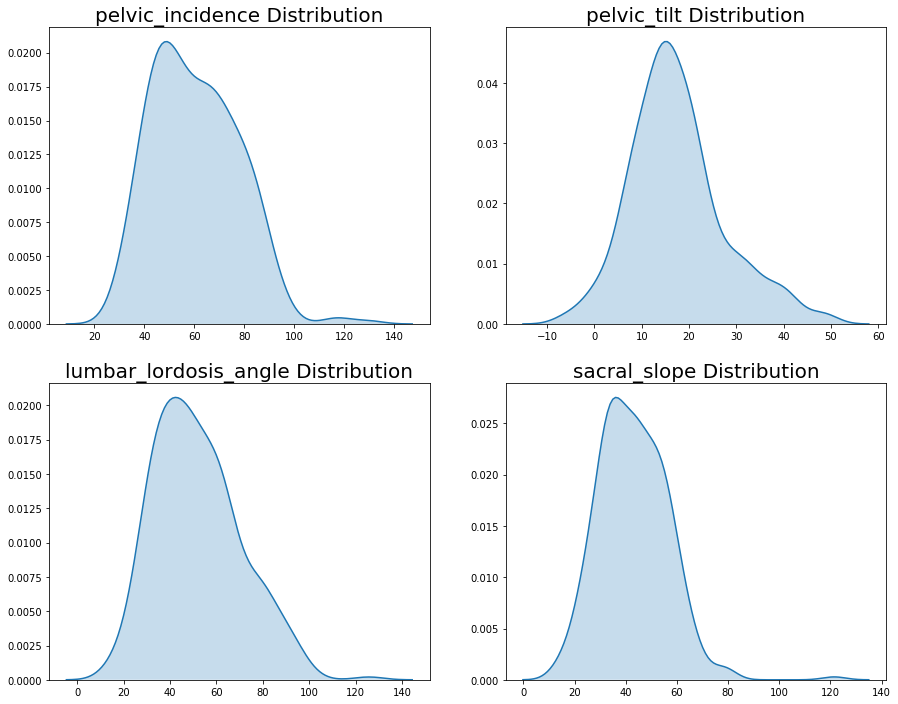

In [1034]:
#prepare subplots, with 2 columns and 2 rows
##plotting sitribution  of pelvic_incidence,pelvic_tilt numeric,lumbar_lordsis_angle,sacral_scope using kernel denisty diagram
fig1, ((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2)
#set full plot size
fig1.set_size_inches(15,12)
sns.kdeplot(threeclass_df['pelvic_incidence'], ax=ax11, shade=True, legend=False)
ax11.set_title("pelvic_incidence Distribution", fontsize=20)
sns.kdeplot(threeclass_df['pelvic_tilt'], ax=ax12, shade=True, legend=False)
ax12.set_title("pelvic_tilt Distribution", fontsize=20)
sns.kdeplot(threeclass_df['lumbar_lordosis_angle'], ax=ax13, shade=True, legend=False)
ax13.set_title("lumbar_lordosis_angle Distribution", fontsize=20)
sns.kdeplot(threeclass_df['sacral_slope'], ax=ax14, shade=True, legend=False)
ax14.set_title("sacral_slope Distribution", fontsize=20)
## From the below kdeplot it shows that the pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope numeric attributes are slightly skewed to the right

Text(0.5, 1.0, 'degree_spondylolisthesis Distribution')

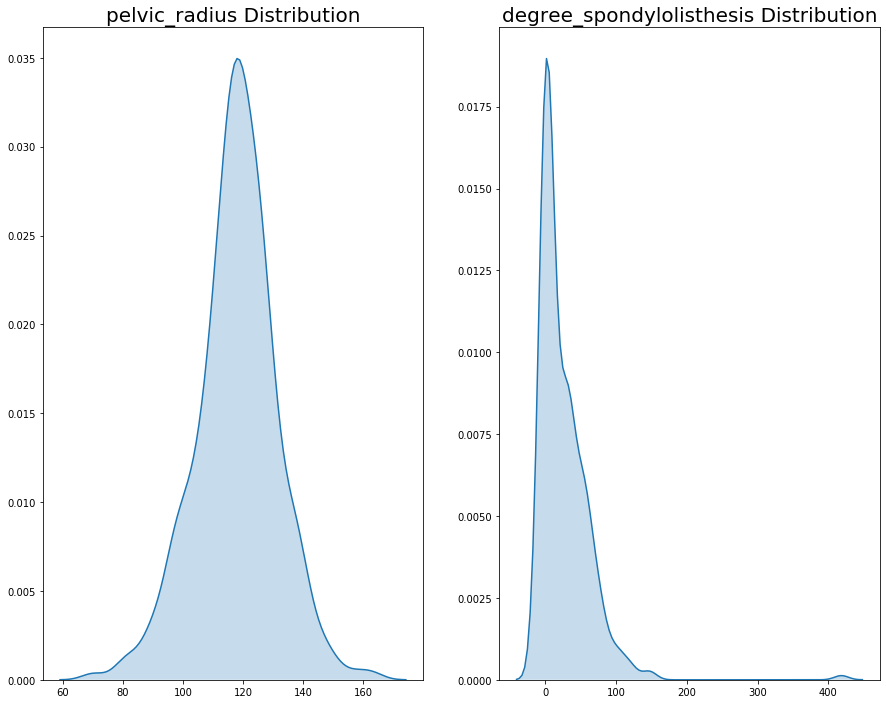

In [1035]:
fig1, (ax11,ax12) = plt.subplots(1,2)
#set full plot size
##plotting the distribution of pelvic_radius distribution and degree_spndylolisthesis using kernel denisty diagram
fig1.set_size_inches(15,12)
sns.kdeplot(threeclass_df['pelvic_radius'], ax=ax11, shade=True, legend=False)
ax11.set_title("pelvic_radius Distribution", fontsize=20)
sns.kdeplot(threeclass_df['degree_spondylolisthesis'], ax=ax12, shade=True, legend=False)
ax12.set_title("degree_spondylolisthesis Distribution", fontsize=20)
## from the below kde distribution, we can observe that pelvic_radius attribute is slightly skewed towards left
##and degree_spondylolisthesis is skewed towards right

In [1036]:
 ##Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

Text(0.5, 1.0, 'Distribution of different classes for pelvic_radius and sacral_slope')

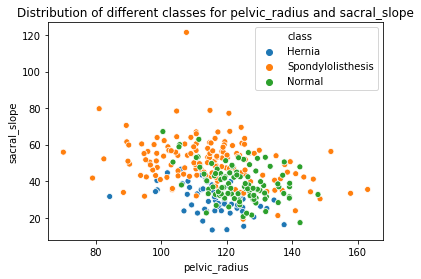

In [1037]:
##using scatterplot to plot the distribution of different classes for pelvic_raidus and sacral_Scope for visualization
x = threeclass_df['pelvic_radius']
y = threeclass_df['sacral_slope']
ax = sns.scatterplot(x, y, hue="class" , data = threeclass_df)
ax.set_title("Distribution of different classes for pelvic_radius and sacral_slope")
## From the below scatter plot it can be inferred that for spondylylothesis class there is higher correlation between pelvic_radius and sacral_slope 
##The outliers can be found for Spondylolisthesis class
   

In [1038]:
# Encode the Class variable to integer.

In [1039]:
## encoding the Class variable to integer.

In [1040]:
# Apply the fitted encoder to the species column to convert the categorical value to numeric

threeclass_df['class'] = preprocessing.LabelEncoder().fit_transform(threeclass_df['class'])
## After applying encoder hernia class are converted to 0 and normal class are converted to 1 and Spondylolisthesis to 2

In [1041]:
##the converted data for encoding
threeclass_df['class'].value_counts()

2    150
1    100
0     60
Name: class, dtype: int64

In [1042]:
# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [1043]:
## creating the X(Feature-set)  and Y(Target-set)

In [1044]:
## target set is formed by having only the dependent column 
threeclass_label = threeclass_df['class']

In [1045]:
##Feature set is formed by dropping the target column. Feature set consist of only independent columns
threeclass_feature_df = threeclass_df.drop(['class'], axis = 1)
threeclass_feature_df.shape
##the class attribute is dropped which can be shown below

(310, 6)

In [1046]:
# Normalize your Data (X) to get values between 0 to 1.

In [1047]:
## The data should not be normalised before forming the train and test data as there is possibility of data leaks
##hence normalising data will be done afer forming the train and test data

In [1048]:
# Split the dat as train and test with a ratio of 70:30.

In [1049]:
## splitting the train and test data with 70 : 30 ratio

In [1050]:
#using train_test_split to split the data into 70% of training data and 30% of testing data
threeclass_feature_train_df, threeclass_feature_test_df, threeclass_label_train, threeclass_label_test = train_test_split(threeclass_feature_df, threeclass_label, test_size=0.30,random_state=5)
print('The shape of threeclass_feature_train dataset is',threeclass_feature_train_df.shape)
print('The shape threeclass_feature_test data is',threeclass_feature_test_df.shape)
## 

The shape of threeclass_feature_train dataset is (217, 6)
The shape threeclass_feature_test data is (93, 6)


In [1051]:
# Build the KNN model using Train Dataset and predict the class on test dataset.

In [1052]:
##building KNN model with train dataset
knn = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform', metric='euclidean')
## using stand scalar to normalize the data which is done only after splitting the train and test data to prevent data leaks
sc=StandardScaler()
scaled_threeclass_feature_train_df = sc.fit_transform(threeclass_feature_train_df)
scaled_threeclass_feature_test_df = sc.transform(threeclass_feature_test_df)
##calculate nearest neighbor algorithm
knn.fit(scaled_threeclass_feature_train_df,threeclass_label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1053]:
# For every test data point, predict it's label based on 21 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_threeclass_label = knn.predict(scaled_threeclass_feature_test_df)


In [1054]:
# Calculate the performance score of of your classification on test dataset.
##Hint- You can use knn.score( ) function.

In [1055]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases
print('The accuracy score is',knn.score(scaled_threeclass_feature_test_df , threeclass_label_test))

The accuracy score is 0.8387096774193549


In [1056]:
## The test data has below distribution amoong spondylylothesis  , hernia and normal class
threeclass_label_test.value_counts()

2    43
1    33
0    17
Name: class, dtype: int64

In [1059]:
##calculating confusion matrix which is a tabel that is often used to describe the performance of a classification model on a set of test data for which the true values ar known
confusion = metrics.confusion_matrix(threeclass_label_test,predicted_threeclass_label, labels= [0 ,1 ,2])
print('confusion matrix is :')
print(confusion)
##it can be inferred that spondylylothesis class has 4 false negative and hernia has 6 false negative values and normal class 5 false negatives
## the data should be considered for resampling

confusion matrix is :
[[11  6  0]
 [ 4 28  1]
 [ 1  3 39]]


In [1061]:
##classification report
print('Report  : ')
print(classification_report(threeclass_label_test, predicted_threeclass_label))
## from the classification report we can observe that precision metrics has 97 % accuracy for individual spondylylotheis class and recall shows accuracy of 91% for individual spondylylithosis class 
##Need to find more acuracy with the test data with optimal value of K

Report  : 
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.76      0.85      0.80        33
           2       0.97      0.91      0.94        43

    accuracy                           0.84        93
   macro avg       0.81      0.80      0.80        93
weighted avg       0.85      0.84      0.84        93



In [1062]:
# What is the best K value for your classifcation?
#Find at which k value you get the best score.

The accuracy of neighbour 1 is 0.7634408602150538
The accuracy of neighbour 3 is 0.7419354838709677
The accuracy of neighbour 5 is 0.7741935483870968
The accuracy of neighbour 7 is 0.7526881720430108
The accuracy of neighbour 9 is 0.7849462365591398
The accuracy of neighbour 11 is 0.7741935483870968
The accuracy of neighbour 13 is 0.7956989247311828
The accuracy of neighbour 15 is 0.8172043010752689
The accuracy of neighbour 17 is 0.7849462365591398
The accuracy of neighbour 19 is 0.8064516129032258
The accuracy of neighbour 21 is 0.7956989247311828
The accuracy of neighbour 22 is 0.7741935483870968
The accuracy of neighbour 25 is 0.7849462365591398
The accuracy of neighbour 27 is 0.7956989247311828
The accuracy of neighbour 29 is 0.7849462365591398
The accuracy of neighbour 30 is 0.8064516129032258
The accuracy of neighbour 35 is 0.7956989247311828
bycomparing the plot between trained and test data, it can be inferred that a K =15 we get optimal performance during test as that of trai

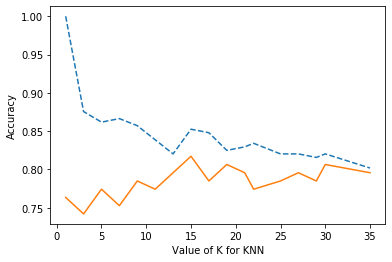

In [1063]:
neighbours = np.array([1,3,5,7,9,11,13,15,17,19,21,22,25,27,29,30,35])
testnew = []
trainnew = []
for i in neighbours:
    threeclass_feature_train_df, threeclass_feature_test_df, threeclass_label_train, threeclass_label_test = train_test_split(threeclass_feature_df, threeclass_label, test_size=0.30,random_state=18)
    sc=StandardScaler()
    ##building KNN model with train dataset
    knn = KNeighborsClassifier(n_neighbors= i, weights = 'uniform', metric='euclidean')
    ## using stand scalar to normalize the data
    scaled_threeclass_feature_train_df = sc.fit_transform(threeclass_feature_train_df)
    scaled_threeclass_feature_test_df = sc.transform(threeclass_feature_test_df)
    ##calculate nearest neighbor algorithm
    knn.fit(scaled_threeclass_feature_train_df,threeclass_label_train)
    ##predict the dependent target with the test data
    # For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
    # be assigned to the test data point
    predicted_threeclass_label = knn.predict(scaled_threeclass_feature_test_df)
    ##calculating predicted value using trained label t find the optimal value of K
    predicted_threeclass_label_train = knn.predict(scaled_threeclass_feature_train_df)
    print("The accuracy of neighbour",i, "is",knn.score(scaled_threeclass_feature_test_df , threeclass_label_test))
    ##print("The accuracy of neighbour",i, "is",accuracy_score(twoclass_label_test, predicted_twoclass_label))
    testnew.append(accuracy_score(threeclass_label_test, predicted_threeclass_label))
    trainnew.append(accuracy_score(threeclass_label_train, predicted_threeclass_label_train))
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.plot(neighbours,trainnew, '--')
plt.plot(neighbours,testnew, label = 'test')
## bycomparing the plot between trained and test data, it can be inferred that a K =15 we get optimal performance during test as that of training
print('bycomparing the plot between trained and test data, it can be inferred that a K =15 we get optimal performance during test as that of training, hence the ptimal value for K is 15')
print('Random seed is choosen considering closes precision to train and test accuracy')
print('The data should be considered for resampling as getting very low accuracy with different values of K')

